## <center>Gradient Descent Implementation</center>
<center>Implementing Gradient Descent in simple and multiple linear regression using housing dataset</center>

### Importing dataset

In [22]:
import pandas as pd            
import numpy as np
import seaborn as sns

#to visualize in the notebook
%matplotlib inline

In [13]:
house_df = pd.read_csv('Housing.csv')
house_df.head()                 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Data cleasing 
Converting objects to numericals

In [14]:
house_df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [15]:
#Converting yes to 1 and no to 0
house_df['mainroad'] = house_df['mainroad'].map({'yes' : 1, 'no' : 0})
house_df['guestroom'] = house_df['guestroom'].map({'yes' : 1, 'no' : 0})
house_df['basement'] = house_df['basement'].map({'yes' : 1, 'no' : 0})
house_df['hotwaterheating'] = house_df['hotwaterheating'].map({'yes' : 1, 'no' : 0})
house_df['airconditioning'] = house_df['airconditioning'].map({'yes' : 1, 'no' : 0})
house_df['prefarea'] = house_df['prefarea'].map({'yes' : 1, 'no' : 0})

In [16]:
furnishing_status = np.unique(house_df['furnishingstatus'])
furnishing_status

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [17]:
#furnishingstatus converted to binary using get_dummies
status = pd.get_dummies(house_df['furnishingstatus'], drop_first=True)
house_df = pd.concat([house_df, status], axis=1)
house_df.drop(['furnishingstatus'], axis=1, inplace=True)

In [18]:
house_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


### Normalising the data
Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale and/or close to normally distributed. 

In [19]:
house_df = (house_df - house_df.mean())/house_df.std()
house_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,-0.844113,-0.69579
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,-0.844113,-0.69579
2,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,1.182502,-0.69579
3,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,-0.844113,-0.69579
4,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,-0.844113,-0.69579


### Linear Regression
- Assinging feature as input to X 
- Assigning the price result as output to Y

In [20]:
X = house_df['area']
y = house_df['price']

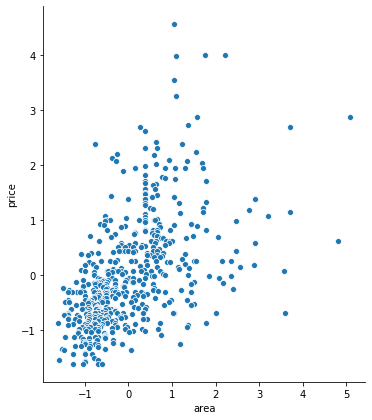

In [28]:
#visualising the input and output data on scatterplot
sns.pairplot(house_df, x_vars='area', y_vars='price', size=6, aspect=0.9, kind='scatter')

### Formulas
For linear regression we use a cost function known as the mean squared error or MSE.

 J(m, c) = ᵢ₌₁⅀ⁿ (yᵢ - (mxᵢ + c))²
 
 where m = slope, c = Intercept

Applying partial derivative with respect to m and c and equating it to zero to find the least value of m and c for which the cost function gets the lowest value as possible.

𝜕J/𝜕m = 2 ᵢ₌₁⅀ⁿ (yᵢ - (mxᵢ + c))(-xᵢ)

𝜕J/𝜕c = 2 ᵢ₌₁⅀ⁿ (yᵢ - (mxᵢ + c))(-1)

### Applying gradient descent from scratch 
we need to convert X and y variables as numpy arrays.

In [29]:
X = np.array(X)
y = np.array(y)

In [30]:
def gradient_descent(X, y, m_curr = 0, c_curr = 0, iterations=1000, learning_rate=0.01):
    n = float(len(y))
    grad_desc_df = pd.DataFrame(columns = ['m_curr', 'c_curr', 'cost'])
    for i in range(iterations):
        y_curr = (m_curr * X) + c_curr
        cost = sum([data**2 for data in (y - y_curr)]) / n
        m_grad = -(2/n) * sum(X * (y - y_curr))
        c_grad = -(2/n) * sum(y - y_curr)
        m_curr = m_curr - (learning_rate * m_grad)
        c_curr = c_curr - (learning_rate * c_grad)
        grad_desc_df.loc[i] = [m_curr, c_curr, cost]
    
    return grad_desc_df

In [31]:
# printing gradients at multiple (m, c) pairs
# we can notice that gradient decreases gradually towards 0
grad_desc = gradient_descent(X, y)
grad_desc

,m_curr,c_curr,cost
0,0.010700,5.117211e-18,0.998165
1,0.021187,2.230224e-17,0.986830
2,0.031464,3.243888e-17,0.975943
3,0.041536,3.045067e-17,0.965486
4,0.051407,2.675943e-17,0.955442
5,0.061081,3.053215e-17,0.945796
6,0.070562,3.956876e-17,0.936530
7,0.079854,4.067694e-17,0.927631
8,0.088960,4.414817e-17,0.919084
9,0.097884,5.958944e-17,0.910875


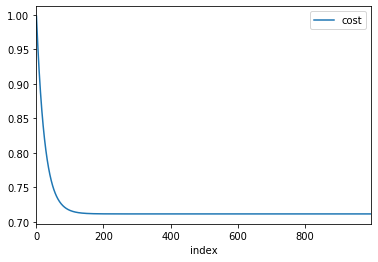

In [32]:
# plotting cost against num_iterations
grad_desc.reset_index().plot.line(x='index', y=['cost'])

### Multiple Regression
Applying Gradient Descent for Features more than 1


In [33]:
X = house_df[['area', 'bedrooms']]
y = house_df['price']

In [34]:
# Add a columns of 1s as an intercept to X.
# The intercept column is needed for convenient matrix representation of cost function

X['intercept'] = 1
X = X.reindex_axis(['intercept', 'area', 'bedrooms'], axis=1)
X.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """


,intercept,area,bedrooms
0,1,1.045766,1.402131
1,1,1.755397,1.402131
2,1,2.216196,0.047235
3,1,1.082630,1.402131
4,1,1.045766,1.402131


In [35]:
X = np.array(X)
y = np.array(y)

In [36]:
# Theta is the vector representing coefficients (intercept, area, bedrooms)
theta = np.matrix(np.array([0, 0, 0]))
alpha = 0.01
iterations = 1000

In [37]:
# define cost function
# takes in theta (current values of coefficients b0, b1, b2), X and y
# returns total cost at current b0, b1, b2

def cost_funct(X, y, theta):
    n = len(y)
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * n)

### Implementing gradient descent for multiple regression
θ₀:= θ₀ - α 1/m  ᵢ₌₁⅀ⁿ (h𝜃(xⁱ) - yⁱ).x₀ⁱ

θ₁:= θ₁ - α 1/m  ᵢ₌₁⅀ⁿ (h𝜃(xⁱ) - yⁱ).x₁ⁱ

θ₂:= θ₂ - α 1/m  ᵢ₌₁⅀ⁿ (h𝜃(xⁱ) - yⁱ).x₂ⁱ

In [38]:
# takes in current X, y, learning rate, alpha, iterations
# returns cost function
def gradient_descent_multi(X, y, theta, alpha, iters):
    theta = np.zeros(X.shape[1])
    m = len(X)
    grad_desc_df = pd.DataFrame(columns = ['Beta', 'cost'])
    
    for i in range(iters):
        grad_desc = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * grad_desc
        cost = cost_funct(X, y, theta)
        grad_desc_df.loc[i] =[theta, cost]
        
    return grad_desc_df

In [39]:
# print costs with various values of coefficients b0, b1, b2
gradient_descent_multi(X, y, theta, alpha, iterations)

,Beta,cost
0,"[2.3711919278232707e-18, 0.005350138644096793,...",0.494906
1,"[3.617901085750969e-18, 0.010641328951860771, ...",0.490824
2,"[5.785382366854027e-18, 0.015874226967184046, ...",0.486834
3,"[8.075090035989212e-18, 0.021049481374934606, ...",0.482935
4,"[1.0368871918058801e-17, 0.026167733584010238,...",0.479124
5,"[1.2243009867884753e-17, 0.031229617809450716,...",0.475400
6,"[1.472827975787134e-17, 0.03623576115361897, 0...",0.471759
7,"[1.62235159047977e-17, 0.041186783686461836, 0...",0.468202
8,"[1.7910240059641056e-17, 0.04608329852486083, ...",0.464724
9,"[2.06399627256919e-17, 0.05092591191108336, 0....",0.461326


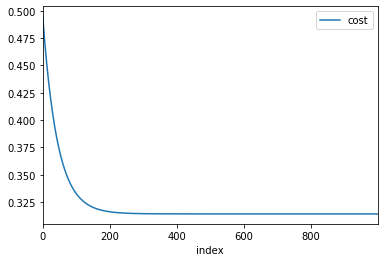

In [40]:
#print cost
gradient_descent_multi(X, y, theta, alpha, iterations).reset_index().plot.line(x = 'index', y =['cost'])

### Conclusion
We have implemented gradient descent for linear and multiple regression models for housing dataset and learnt how the cost function can be reduced using gradient descent. 

### Reference
https://kaggle.com/jnikhilsai/gradient-descent-implementation